#   *-Cat vs Dog Classifier-*

In [1]:
import numpy as np # import the numpy library
import matplotlib.pyplot as plt # import matplotlib for ploting of graphs 
%matplotlib notebook # Allow plots to be plotted in 
import tensorflow as tf # a data flow library used for machine learning
from scipy import misc # an open source scientific computing library
import pandas as pd # an open source data science library
import cv2 # computer vision library mainly used in image processing

In [2]:
import os # library of functions that allows you access to your local machine

In [3]:
# randomizes the files in the named directory
arr = os.listdir('C:/Users/Owner/Desktop/CAT DOG/train/train/train/')
np.random.shuffle(arr)

In [165]:
# extract training features from directory
train = [] # Creates an empty list to be filled with the extracted images in img

for filename in arr: # iterates through each of the randomized file in arr
    if filename.endswith('.jpg'): # checks to see if file ends with '.jpg'
        img = misc.imread('C:/Users/Owner/Desktop/CAT DOG/train/train/train/{}'.format(filename)) # reads the image file with filename
        img = img[::2,::2] # Reduce image quality
        #img = cv2.resize(img, (125,125)) # 
        #img = (img/225.0).reshape(-1)
        train.append(img)
        continue
    else:
        continue

In [21]:
X = []
Y = []

import re
for filename in arr:
    img = misc.imread('C:/Users/Owner/Desktop/CAT DOG/train/train/train/{}'.format(filename))
    img = img[::2,::2]
    img = cv2.resize(img, (125,125))
    img = (img/225.0).reshape(-1)
    X.append(img)
    if filename.startswith('cat'): Y.append(1)
    else: Y.append(0)
   

In [22]:
np.save('input_data.npy', X)

In [23]:
np.save('label.npy', Y)

#### Cat image after resizing to 125*125

<IPython.core.display.Javascript object>


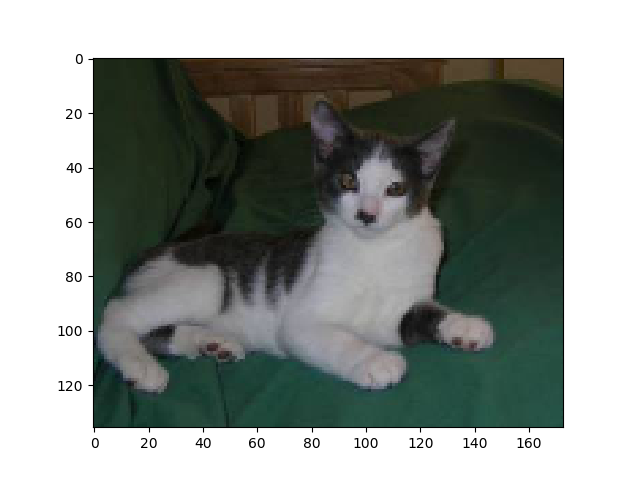

In [166]:
plt.imshow(train[20])

#### Cat image with original dimensions 

<IPython.core.display.Javascript object>


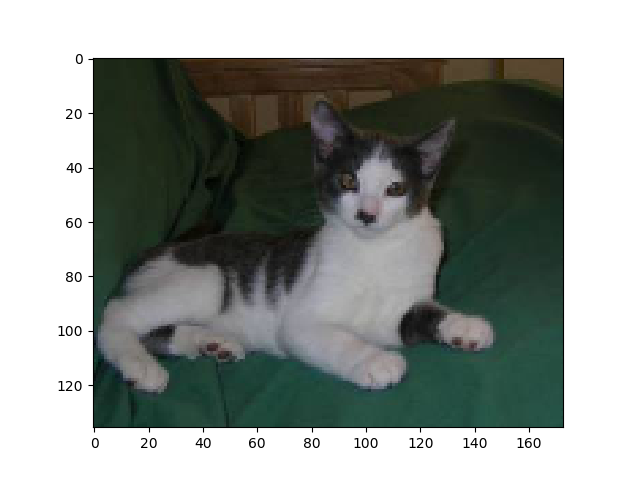

In [167]:
plt.imshow(train[20])
# Display of image should be done before flattening 

# Neural Network model Cat or Dog

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### Defining Neural network Structure

**Define Three Variables :**
    - n_x: The size of the input layer
    - n_h: The size of the hidden layer
    - n_y: The size of the ouput layer
**Hint**: Use X and Y to find n_x and n_y and then hard code the layer size

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = np.array(np.load('input_data.npy'))

Y = np.array(np.load('label.npy'))

Train = pd.DataFrame(X).T.iloc[:,:420]

Test = pd.DataFrame(X).T.iloc[:,420:]

y_Train = pd.DataFrame(Y)[:420]

y_Test = pd.DataFrame(Y)[420:]

y_Test = y_Test.T
y_Train = y_Train.T

### Helper functions

In [2]:
def sigmoid(z):
    """Compute Sigmoid of z
    Arguments z => a scaler quantity
    Return s ....... Singmoid(z)"""
    s = 1/(1+np.exp(-z)) # This equation describes the definition of the sigmoid function
    return s

In [3]:
def sigmoid1(Z):
    """Compute Sigmoid of Z
    Arguments Z => a scaler quantity
    Return s ....... Sigmoid(Z)"""
    s = 1/(1+np.exp(-Z)) # This equation describes the definition of the sigmoid function
    return s, Z

In [6]:
def sigmoid_derivative(Z):
    """Compute the derivative of the sigmoid of Z
    Rguments Z ==> a scaler quantity
    Return a ..... sigmoid_derivative(Z)
    """
    s = 1/(1 + np.exp(-Z))
    a = np.multiply(s, (1 - s))
    return a, Z

In [4]:
# The Relu: Rectified Linear Unit
def relu(Z):
    s = max(0,Z)
    return s

In [5]:
# The Relu: Rectified Linear Unit with cache
def relu1(Z):
    s = max(0,Z)
    return s, Z

In [207]:
def relu_derivative(Z):
    if Z < 0: s = 0
    else: s = 1
    return s, Z

In [ ]:
def 

In [211]:
def Logcost(A, y_Train):
    m = y_Train.shape[1]
    logs = np.multiply(y_Train, np.log(A)) + np.multiply((1 - y_Train), np.log(1-A))
    cost = -(1/m)*np.sum(logs, axis = 1)
    return cost

In [27]:
def layer_sizes(X, Y, n):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] # size of input layer
    n_h = n
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [28]:
n_x, n_h, n_y = layer_sizes(Train, y_Train, 4)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 46875
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


### Initialize the model's parameters

- Make sure your parameters' sizes are right.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` or `b = 0` to initialize b which will become a matrix of shape (a,b) during broadcasting.

In [29]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [30]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]), '\n'*2)

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"].shape))
print("b1 = " + str(parameters["b1"].shape))
print("W2 = " + str(parameters["W2"].shape))
print("b2 = " + str(parameters["b2"].shape))

W1 = [[-0.00416758 -0.00056267 -0.02136196 ..., -0.00989743 -0.00656098
   0.00560609]
 [-0.00781498 -0.00282917  0.00115725 ..., -0.00162159  0.00647496
  -0.00277555]
 [ 0.00624816  0.01333095  0.00422484 ..., -0.00162666  0.00039406
   0.00049182]
 [-0.01597993 -0.01324958 -0.00762092 ..., -0.00316868 -0.00421742
  -0.01316135]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.00293307  0.00426807 -0.00034052 -0.00535128]]
b2 = [[ 0.]] 


W1 = (4, 46875)
b1 = (4, 1)
W2 = (1, 4)
b2 = (1, 1)


In [31]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [32]:
A2, cache = forward_propagation(Train, parameters)

In [33]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -(1/m)*np.sum(logprobs, axis=1)
    
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    #assert(isinstance(cost, float))
    
    return cost

print("cost = " + str(compute_cost(A2, Train, parameters)))

cost = 0        0.693423
1        0.693262
2        0.692976
3        0.693382
4        0.693214
5        0.692917
6        0.693381
7        0.693211
8        0.692907
9        0.693379
10       0.693209
11       0.692910
12       0.693443
13       0.693271
14       0.692972
15       0.693485
16       0.693308
17       0.692987
18       0.693534
19       0.693349
20       0.693030
21       0.693530
22       0.693344
23       0.693032
24       0.693537
25       0.693357
26       0.693060
27       0.693586
28       0.693411
29       0.693120
           ...   
46845    0.693721
46846    0.693496
46847    0.693220
46848    0.693744
46849    0.693511
46850    0.693240
46851    0.693732
46852    0.693503
46853    0.693234
46854    0.693721
46855    0.693507
46856    0.693244
46857    0.693649
46858    0.693452
46859    0.693192
46860    0.693609
46861    0.693416
46862    0.693173
46863    0.693594
46864    0.693406
46865    0.693168
46866    0.693574
46867    0.693398
46868    0.693155
468

In [34]:
def back_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    #dZ2 = A2 - Y
    #dW2 = (1/m)*np.dot(dZ2,A1.T)
    #db2 = (1/m)*np.sum(dZ2, axis=1)
    #dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    #dW1 = (1 / m) * np.dot(dZ1, X.T)
    #db1 = (1 / m) * np.sum(dZ1, axis=1)
    ### END CODE HERE ###
    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = np.array([(1/m)*np.sum(dZ2, axis = 1)])
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = np.array([(1/m)*np.sum(dZ1, axis =1)]).T
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [35]:
grads = back_propagation(parameters, cache, Train, y_Train)

In [36]:
def update_parameters(parameters, grads, learning_rate=0.0002):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    #W1 = W1 - learning_rate * dW1
    #b1 = np.array(b1 - learning_rate * db1)
    #W2 = W2 - learning_rate * dW2
    #b2 = np.array(np.squeeze(b2) - learning_rate * db2)
    ### END CODE HERE ###
    
    W1 = W1 - np.multiply(learning_rate, dW1)
    b1 = b1 - np.multiply(learning_rate, db1)
    W2 = W2 - np.multiply(learning_rate, dW2)
    b2 = np.squeeze(b2) - np.multiply(learning_rate, db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [37]:
parameters = update_parameters(parameters, grads, 1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00414186 -0.0005145  -0.02132299 ..., -0.00990288 -0.0065503
   0.00558755]
 [-0.0078198  -0.00284018  0.00114736 ..., -0.0016163   0.00647899
  -0.00276321]
 [ 0.00624729  0.01333239  0.00422595 ..., -0.00163164  0.00039093
   0.0004862 ]
 [-0.01593829 -0.01317013 -0.00755033 ..., -0.00321181 -0.00422658
  -0.01321702]]
b1 = [[  4.06392072e-05]
 [ -5.15179675e-06]
 [ -2.28483435e-06]
 [  3.09982397e-05]]
W2 = [[ 0.00875988  0.00521144 -0.00695542 -0.00258285]]
b2 = [[-0.00080909]]


In [38]:
def model(X, Y, n_h,learning_rate, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y,n_h)[0]
    n_y = layer_sizes(X, Y,n_h)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    
    costs = []

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = back_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        costs.append(cost)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            continue
    plt.figure(figsize=(8,6))
    plt.plot(costs)
    plt.show()
    return parameters

Cost after iteration 0: 0.692896
Cost after iteration 1000: 0.417627
Cost after iteration 2000: 0.628742
Cost after iteration 3000: 0.585236
Cost after iteration 4000: 0.074900
Cost after iteration 5000: 0.048958
Cost after iteration 6000: 0.028553
Cost after iteration 7000: 0.017291
Cost after iteration 8000: 0.012622
Cost after iteration 9000: 0.010703


<IPython.core.display.Javascript object>


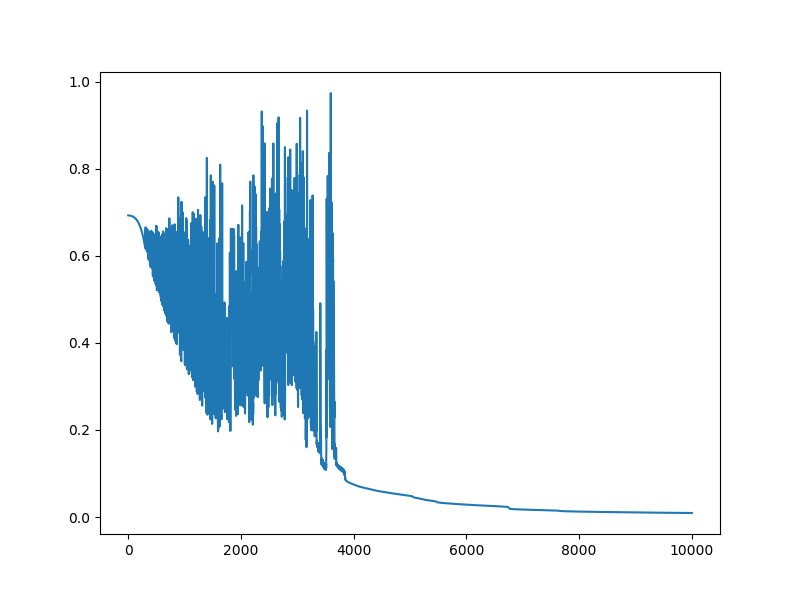

W1 = [[-0.00552442 -0.00740936 -0.02861095 ..., -0.01080678 -0.00978968
   0.00899091]
 [-0.00596148  0.00276151  0.0022004  ...,  0.00036275  0.00969899
  -0.00525467]
 [ 0.00683877  0.02350047  0.01314502 ..., -0.00721486 -0.00382866
  -0.01945695]
 ..., 
 [-0.01251275 -0.01500136 -0.00622653 ...,  0.00050834  0.00834349
  -0.00439832]
 [ 0.02804528 -0.01258923  0.00965574 ..., -0.01505374 -0.00369981
  -0.00979838]
 [-0.02385452  0.00034189  0.00321105 ..., -0.00419975  0.01757877
   0.00211734]]
b1 = [[ 0.0023573 ]
 [-0.0018175 ]
 [-0.0198072 ]
 [-0.00567599]
 [-0.00269044]
 [-0.000248  ]
 [ 0.00262723]
 [-0.01156946]]
W2 = [[ 0.47007033 -0.90594188 -1.90132402  0.98140819 -1.19685852 -0.24347352
   1.24697133 -1.98598497]]
b2 = [[ 0.25453625]]


In [39]:
parameters = model(Train, y_Train,n_h=8, learning_rate=0.01,num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

In [168]:
def predict(parameters, test):
    A2, cache = forward_propagation(test, parameters)
    prediction = np.round(A2, decimals=0)
    return prediction

In [169]:
predictions = predict(parameters, Train)

print ('Train Set Accuracy: %d' % float((np.dot(y_Train,predictions.T) + np.dot(1-y_Train,1-predictions.T))/float(y_Train.size)*100) + '%')

Train Set Accuracy: 100%


In [170]:
predictions = predict(parameters, Test)

print ('Test set Accuracy: %d' % float((np.dot(y_Test,predictions.T) + np.dot(1-y_Test,1-predictions.T))/float(y_Test.size)*100) + '%')

Test set Accuracy: 53%


In [171]:
from sklearn import metrics

In [172]:
y_Test.iloc[0,:].value_counts().head(1)[1]

41

In [173]:
y_Test.iloc[0,:].mean()

0.5125

In [174]:
# Null Accuracy for any given number of classification is given by:
print('Null Accuracy -- ',str(round(y_Test.iloc[0,:].value_counts().head(1)[1]/y_Test.shape[1] * 100))+'%')
print ('Test set Accuracy: %d' % float((np.dot(y_Test,predictions.T) + np.dot(1-y_Test,1-predictions.T))/float(y_Test.size)*100) + '%')

Null Accuracy --  51.0%
Test set Accuracy: 53%


##### Since the null accuracy is very close to the test set accuracy, the model does not adequately generalize 

## Confusion matrix

In [175]:
confusion = metrics.confusion_matrix(y_Test.iloc[0,:], predictions.T)
print(confusion)

[[23 16]
 [21 20]]


In [176]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [177]:
print('Classification Accuracy -- ',str((TP + TN)/float(TP+TN+FP+FN)*100)+'%')
print('Classification Accuracy -- ',str(metrics.accuracy_score(y_Test.iloc[0,:], predictions.T)*100)+'%')

Classification Accuracy --  53.75%
Classification Accuracy --  53.75%


In [178]:
print('Classification Error -- ',str(((FP + FN)/float(TP+TN+FP+FN)*100))+'%')
print('Classification Error -- ',str((1 - metrics.accuracy_score(y_Test.iloc[0,:], predictions.T))*100)+'%')

Classification Error --  46.25%
Classification Error --  46.25%


### Sensitivity/ Recall/ TPRate

In [179]:
print('Sensitivity -- ', round(TP/(TP + FN), 2))
print('Sensitivity -- ', round(metrics.recall_score(y_Test.iloc[0,:], predictions.T), 2))

Sensitivity --  0.49
Sensitivity --  0.49


### Specificity/ TNRate

In [180]:
print('Specificity -- ', round(TN/(FP+TN), 2))

Specificity --  0.59


### False positive rate

In [181]:
print('False Positive Rate -- ', round(FP/(TN+FP), 2))

False Positive Rate --  0.41


### Precision

In [182]:
print('Precision -- ', round(TP/(TP+FP), 2))
print('Precision -- ', round(metrics.precision_score(y_Test.iloc[0,:], predictions.T), 2))

Precision --  0.56
Precision --  0.56


### OVERFITTING (Bad Classifier)
While this model has a train set accuracy of 100% it performs poorly on the test set, as such will not generalize to new data